In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('D:\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\gene_expression.csv')

In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(0.0, 8.5)

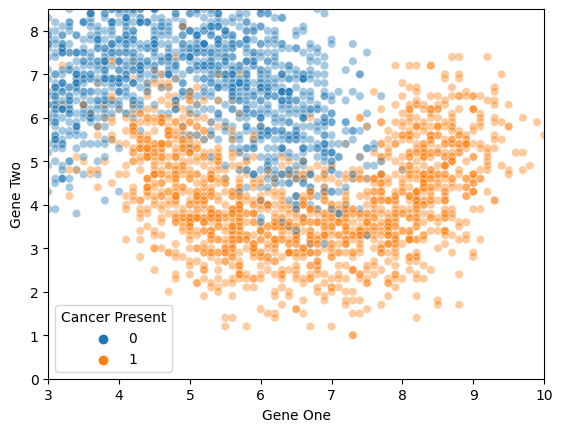

In [17]:
sns.scatterplot(data = df , x = 'Gene One' , y = 'Gene Two',hue = 'Cancer Present', alpha = 0.4)
plt.xlim(3,10)
plt.ylim(0,8.5)

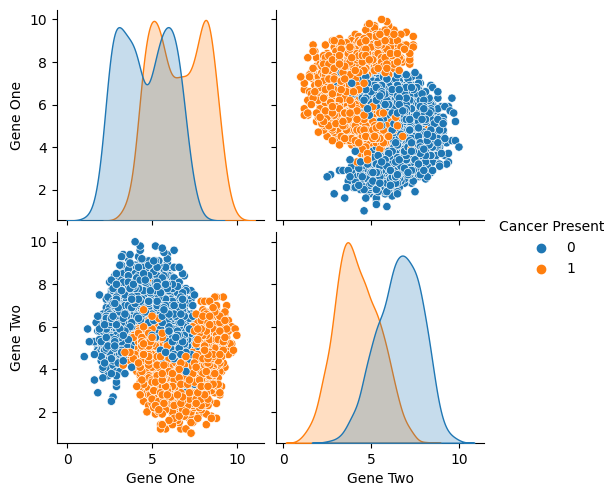

In [19]:
sns.pairplot(data = df , hue = 'Cancer Present' )

In [23]:
X = df.drop('Cancer Present' , axis = 1)

In [24]:
y = df['Cancer Present']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)

In [28]:
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#help(KNeighborsClassifier)

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [77]:
knn_model.fit(scaled_X_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [78]:
y_pred = knn_model.predict(scaled_X_test)

In [79]:
from sklearn.metrics import confusion_matrix , classification_report , plot_confusion_matrix

In [80]:
confusion_matrix(y_test,y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [81]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


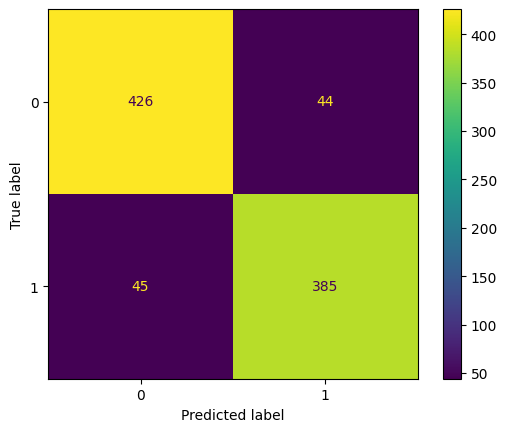

In [82]:
plot_confusion_matrix(knn_model,scaled_X_test,y_test)

# Now we will find the optimum k value , for which we have two methods:

# 1. Elbow method

In [83]:
from sklearn.metrics import accuracy_score

In [85]:
error = 1 - accuracy_score(y_test , y_pred)

In [86]:
error

0.09888888888888892

In [87]:
test_error_rate = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test , y_pred)
    test_error_rate.append(test_error)
    

In [88]:
test_error_rate

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0, 0.5, 'ERRORS')

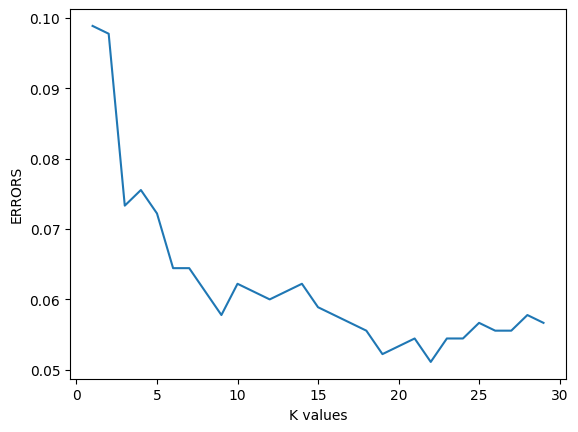

In [91]:
plt.plot(range(1,30) , test_error_rate)
plt.xlabel('K values')
plt.ylabel('ERRORS')

As we can see here error is minimum at k = 22 or nearby 22. But at k = 9 also error is less than 0.06. So it depends on our need which decide whether it is worth it to increase model complexity for very less decrease in error.

# 2. Cross Validate a Gridsearch for multiple k values

### In this case we are going to create PIPELINE which scale the features and fit to model 

In [93]:
scaler = StandardScaler()

In [94]:
knn = KNeighborsClassifier()

In [95]:
operations = [('scaler',scaler) , ('knn' , knn)]

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
pipe = Pipeline(operations)

In [98]:
from sklearn.model_selection import GridSearchCV

In [102]:
k_values = list(range(1,30))

In [108]:
#help(KNeighborsClassifier)

In [109]:
param_grid = {'knn__n_neighbors':k_values}

*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [110]:
full_cv_classifier = GridSearchCV(pipe , param_grid = param_grid , scoring='accuracy' , cv=5)

In [111]:
full_cv_classifier.fit(X_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [117]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 20,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Here we found optimal k value = 20

In [118]:
full_pred = full_cv_classifier.predict(X_test)

In [119]:
print(classification_report(y_test , full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



# Final Model

We just saw that our GridSearch recommends a K=20 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [120]:
scaler = StandardScaler()
knn20 = KNeighborsClassifier(n_neighbors=20)
operations = [('scaler' , scaler),('knn20',knn20)]

In [121]:
pipe = Pipeline(operations)

In [122]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn20', KNeighborsClassifier(n_neighbors=20))])

In [123]:
pipe_y_pred = pipe.predict(X_test)

In [124]:
new_patient = [[3.8,6.4]]

In [125]:
pipe.predict(new_patient)

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [126]:
pipe.predict_proba(new_patient)

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.9, 0.1]])